In [1]:
import csv
import numpy as np
def readSpectrum(file):
    with open(file, "r", newline='') as f:
        rdr = csv.reader(f,delimiter=',')
        rv = []
        for l in rdr:
            try:
                rv.append([float(l[0]),float(l[1])])
            except ValueError:
                pass
    return np.array(rv)

<IPython.core.display.Javascript object>


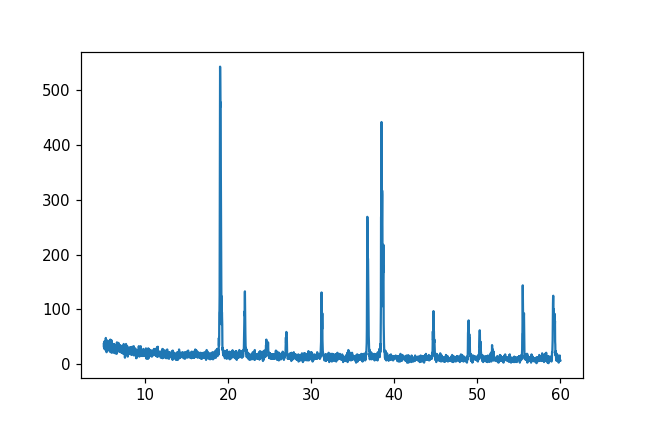

In [2]:
%matplotlib notebook
rv = readSpectrum("BaNO32.csv")
import matplotlib.pyplot as plt
plt.plot(rv[:,0],rv[:,1])

In [3]:
import os,sys
sys.path.insert(0,'./GSASII')
import GSASIIscriptable as G2sc

GSAS-II binary directory: /home/idies/workspace/GSASII/bin


In [4]:
datadir = "/tmp"
PathWrap = lambda fil: os.path.join(datadir,fil)
gpx = G2sc.G2Project(filename=PathWrap('tmp.gpx')) # create a project
# add a phase to the project
phase0 = gpx.add_phase("Ba(NO3)2.cif",
         phasename="Ba(NO3)2",fmthint='CIF')
# add a simulated histogram and link it to the previous phase(s)
hist1 = gpx.add_simulated_powder_histogram("Ba(NO3)2 simulation",
            "LabXRD.prm",5.,120.,0.01,
            phases=gpx.phases())
# Set the scale factor to adjust the y scale
hist1.SampleParameters['Scale'][0] = 1000000.
# parameter optimization and calculate pattern
gpx.data['Controls']['data']['max cyc'] = 0 # refinement not needed
gpx.do_refinements([{}])
gpx.save()
# save results
gpx.histogram(0).Export(PathWrap('tmp_data'),'.csv','hist') # data
gpx.histogram(0).Export(PathWrap('tmp_refl'),'.csv','refl') # reflections


Import_Phase: Error importing file /home/idies/workspace/GSASII/imports/G2phase_rmc6f.py
Error message: No module named 'wx'

/home/idies/workspace/Ba(NO3)2.cif read by Reader CIF
Atom type N+5 not found, using N
gpx file saved as /tmp/tmp.gpx
Instrument parameters read: /home/idies/workspace/LabXRD.prm bank 1
gpx file saved as /tmp/tmp.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
Found 0 SVD zeros
Read from file:/tmp/tmp.bak0.gpx
Save to file  :/tmp/tmp.gpx
GPX file save successful
 Refinement results are in file: /tmp/tmp.lst
 ***** Refinement successful *****
gpx file saved as /tmp/tmp.gpx
/tmp/tmp_refl.csv
PWDR Ba(NO3)2 simulation reflections written to file /tmp/tmp_refl.csv


'/tmp/tmp_refl.csv'

<IPython.core.display.Javascript object>


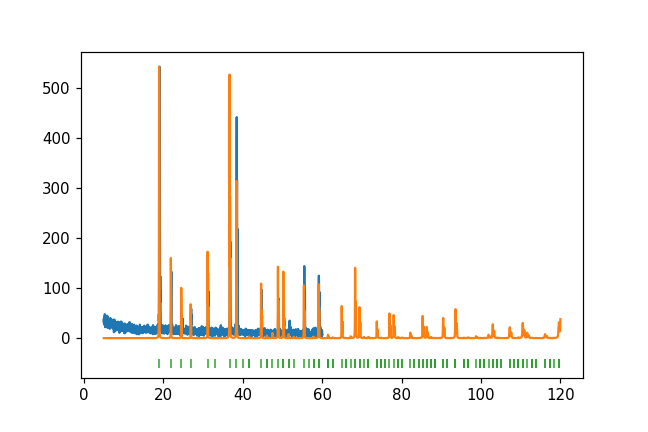

In [5]:
import csv
import numpy as np
with open("/tmp/tmp_data.csv", "r", newline='') as f:
    rdr = csv.reader(f,delimiter=',')
    rv = []
    for l in rdr:
        try:
            rv.append([float(l[0]),float(l[3])])
        except ValueError:
            pass
pred = np.array(rv)
with open("/tmp/tmp_refl.csv", "r", newline='') as f:
    rdr = csv.reader(f,delimiter=',')
    rv = []
    for l in rdr:
        try:
            rv.append([float(l[4]),-50])
        except ValueError:
            pass
        except IndexError:
            pass
ticks = np.array(rv)
bn = readSpectrum("BaNO32.csv")
osf = np.amax(bn[:,1])/np.amax(pred[:,1])
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(bn[:,0],bn[:,1])
plt.plot(pred[:,0],osf*pred[:,1])
plt.plot(ticks[:,0],ticks[:,1], '|')

In [6]:
from pathlib import Path
spectra = {}
for file in Path('./ZrP').glob('*.csv'):
    spectra[str(file)] = readSpectrum(file)
print(spectra)

{'ZrP/ZrP_3.csv': array([[  5.        , -22.6052856 ],
       [  5.0185858 , -22.4499512 ],
       [  5.0371716 , -12.9587402 ],
       ...,
       [ 59.9953822 ,  -2.60732269],
       [ 60.013968  ,  -8.06225586],
       [ 60.0325538 ,  -8.30662537]]), 'ZrP/ZrP_2.csv': array([[  5.        , -22.2261353 ],
       [  5.0185858 ,  -6.70779419],
       [  5.0371716 ,  38.811676  ],
       ...,
       [ 59.9953822 , -11.4839706 ],
       [ 60.013968  ,  -8.4852829 ],
       [ 60.0325538 ,  -9.1651535 ]]), 'ZrP/ZrP_1.csv': array([[  5.        , -23.0651245 ],
       [  5.0185858 , -18.5301514 ],
       [  5.0371716 , -32.9942322 ],
       ...,
       [ 59.9953822 ,  -4.57198715],
       [ 60.013968  ,  -7.1414299 ],
       [ 60.0325538 ,  -7.87400818]])}


In [7]:
datadir = "/tmp"
PathWrap = lambda fil: os.path.join(datadir,fil)
gpx = G2sc.G2Project(filename=PathWrap('tmp.gpx')) # create a project
# add a phase to the project
phase0 = gpx.add_phase("./ZrP/ZrP.cif",
         phasename="ZrP",fmthint='CIF')
# add a simulated histogram and link it to the previous phase(s)
hist1 = gpx.add_simulated_powder_histogram("ZrP simulation",
            "LabXRD.prm",5.,120.,0.01,
            phases=gpx.phases())
# Set the scale factor to adjust the y scale
hist1.SampleParameters['Scale'][0] = 1000000.
# parameter optimization and calculate pattern
gpx.data['Controls']['data']['max cyc'] = 0 # refinement not needed
gpx.do_refinements([{}])
gpx.save()
# save results
gpx.histogram(0).Export(PathWrap('tmp_data'),'.csv','hist') # data
gpx.histogram(0).Export(PathWrap('tmp_refl'),'.csv','refl') # reflection
with open("/tmp/tmp_data.csv", "r", newline='') as f:
    rdr = csv.reader(f,delimiter=',')
    rv = []
    for l in rdr:
        try:
            rv.append([float(l[0]),float(l[3])])
        except ValueError:
            pass
pred = np.array(rv)
with open("/tmp/tmp_refl.csv", "r", newline='') as f:
    rdr = csv.reader(f,delimiter=',')
    rv = []
    for l in rdr:
        try:
            rv.append([float(l[4]),-50])
        except ValueError:
            pass
        except IndexError:
            pass
ticks = np.array(rv)

/home/idies/workspace/ZrP/ZrP.cif read by Reader CIF
Atom type Zr+3 not found, using Zr
Atom type P-3 not found, using P
Atom type P-3 not found, using P
gpx file saved as /tmp/tmp.gpx
Instrument parameters read: /home/idies/workspace/LabXRD.prm bank 1
gpx file saved as /tmp/tmp.gpx
 Hessian Levenberg-Marquardt SVD refinement on 1 variables:
Found 0 SVD zeros
Read from file:/tmp/tmp.bak0.gpx
Save to file  :/tmp/tmp.gpx
GPX file save successful
 Refinement results are in file: /tmp/tmp.lst
 ***** Refinement successful *****
gpx file saved as /tmp/tmp.gpx
/tmp/tmp_refl.csv
PWDR ZrP simulation reflections written to file /tmp/tmp_refl.csv


<IPython.core.display.Javascript object>


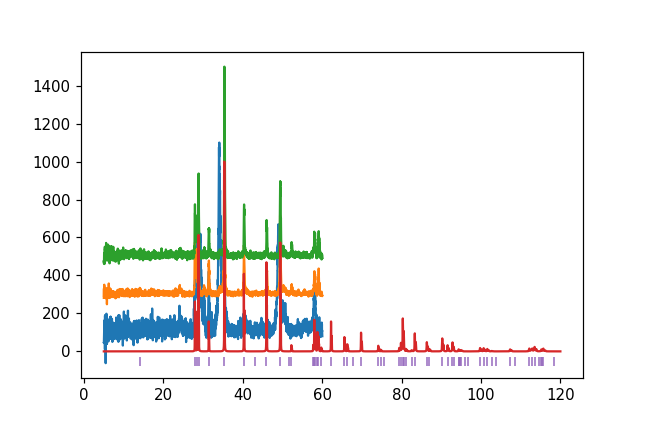

In [8]:
%matplotlib notebook
import matplotlib.pyplot as plt
target = 1000.0
delta = 0.2*target
offset = 0.5*delta
for s in spectra:
    plt.plot(spectra[s][:,0], spectra[s][:,1]*target/np.amax(spectra[s][:,1])+offset)
    offset += delta
plt.plot(pred[:,0],pred[:,1]*target/np.amax(pred[:,1]))
plt.plot(ticks[:,0],ticks[:,1],'|')